<a href="https://colab.research.google.com/github/Drishti-Jain/avengerssample/blob/master/digit_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist

In [2]:
data = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
(train_images, train_labels), (test_images, test_labels) = data

In [4]:
len(train_images)
len(train_labels)

60000

In [5]:
train_images = train_images.reshape((60000, 28, 28, 1))

In [6]:
train_images = train_images.astype('float')/255

In [7]:
test_images = test_images.reshape((10000, 28, 28, 1))

In [8]:
test_images = test_images.astype('float')/255

In [9]:
train_labels[1]

0

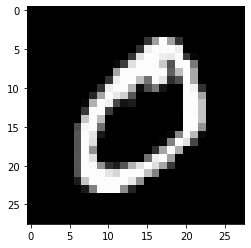

In [10]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
plt.imshow(image.array_to_img(train_images[1]), cmap="gray")

In [11]:
#0 -> [1, 0, 0, 0, 0, 0 , 0 , 0]
#1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]

In [12]:
from keras.utils import to_categorical
train_labels_original = train_labels
train_labels = to_categorical(train_labels)

In [13]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
test_labels_original = test_labels
test_labels = to_categorical(test_labels)

In [15]:
from keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.add(layers.MaxPooling2D((2,2)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.add(layers.MaxPooling2D((2, 2)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
____________________________________________________

In [20]:
model.add(layers.Dense(64, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [21]:
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=100, batch_size=64)

Epoch 1/100
938/938 [==============================] - 8s 8ms/step - loss: 0.1757 - accuracy: 0.9452
Epoch 2/100
938/938 [==============================] - 7s 7ms/step - loss: 0.0480 - accuracy: 0.9848
Epoch 3/100
938/938 [==============================] - 7s 7ms/step - loss: 0.0322 - accuracy: 0.9898
Epoch 4/100
938/938 [==============================] - 7s 7ms/step - loss: 0.0254 - accuracy: 0.9919
Epoch 5/100
938/938 [==============================] - 7s 7ms/step - loss: 0.0197 - accuracy: 0.9937
Epoch 6/100
938/938 [==============================] - 7s 7ms/step - loss: 0.0153 - accuracy: 0.9955
Epoch 7/100
938/938 [==============================] - 7s 8ms/step - loss: 0.0133 - accuracy: 0.9959
Epoch 8/100
938/938 [==============================] - 7s 7ms/step - loss: 0.0103 - accuracy: 0.9968
Epoch 9/100
938/938 [==============================] - 7s 7ms/step - loss: 0.0093 - accuracy: 0.9973
Epoch 10/100
938/938 [==============================] - 7s 7ms/step - loss: 0.0075 - accura

In [25]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.2446 - accuracy: 0.9918


In [26]:
test_loss

0.24462851881980896

In [27]:
test_accuracy

0.9918000102043152

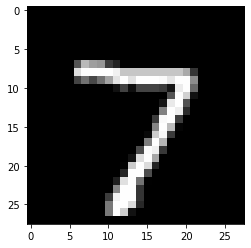

In [28]:
predictions = model.predict(test_images)
#import numpy as np
#predicted_classes = np.argmax(predictions, axis = 1)
plt.imshow(image.array_to_img(test_images[0]), cmap="gray")

In [29]:
test_labels_original[0]

7

In [30]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [33]:
test_images[0].shape

(28, 28, 1)

In [35]:
test_images.shape

(10000, 28, 28, 1)

In [44]:
img = image.load_img(path=""C:\Users\ASUS\Downloads\IMG_20200910_183420.jpg"",grayscale=True,target_size=(28,28,1))

img = image.img_to_array(img)
plt.imshow(image.array_to_img(img), cmap="gray")
img = img.astype('float')/255
test_img = img.reshape((1,28,28,1))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
prediction

SyntaxError: ignored